# ElectroStatic Potential Field

## Units

- Distance: $Å$
- Charge: $e$
- Dipole: $eÅ$ or $D=0.2081943 \; eÅ$
- Potential / Coulomb constant: $e/Å$

## Imports

In [1]:
%matplotlib widget

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import sys
sys.path.append('../src/')
from read import *
from espf import *
from vdwsurface import vdw_surface

## Read and check input

In [2]:
Zs, pos = read_coordinates("input.bas")
print(Zs)
print(pos)

[8 1 1]
[[ 0.      0.      0.1224]
 [ 0.      0.7654 -0.4895]
 [ 0.     -0.7654 -0.4895]]


In [3]:
symbols, q4s = read_charges("PCHARGES_IN")
print(symbols)
print(q4s)
symbols, q7s = read_charges("PCHARGES_OUT")
print(symbols)
print(q7s)

['O' 'H' 'H']
[-0.34965129  0.17482525  0.17482514]
['O' 'H' 'H']
[-0.56169133  0.28084516  0.28084527]


In [4]:
print(compute_dipole(pos, q4s))
print(compute_dipole(pos, q7s))

[ 0.00000000e+00  4.05916769e-07 -1.02765151e+00]
[ 0.00000000e+00 -4.04401081e-07 -1.65085444e+00]


In [5]:
symbols, intradips, resdips, totaldips = read_dipoles("dipoles.out")
print(symbols)
print(intradips)
print(resdips)
print(totaldips)

['O' 'H' 'H']
[[ 0.      0.     -0.6081]
 [-0.     -0.      0.    ]
 [-0.      0.      0.    ]]
[[-0.     -0.     -0.0075]
 [-0.     -0.003  -0.0038]
 [ 0.      0.003  -0.0038]]
[[ 0.     -0.     -0.6157]
 [-0.     -0.003  -0.0038]
 [ 0.      0.003  -0.0038]]


## Along 1D axis

(-4.5, 6.5)

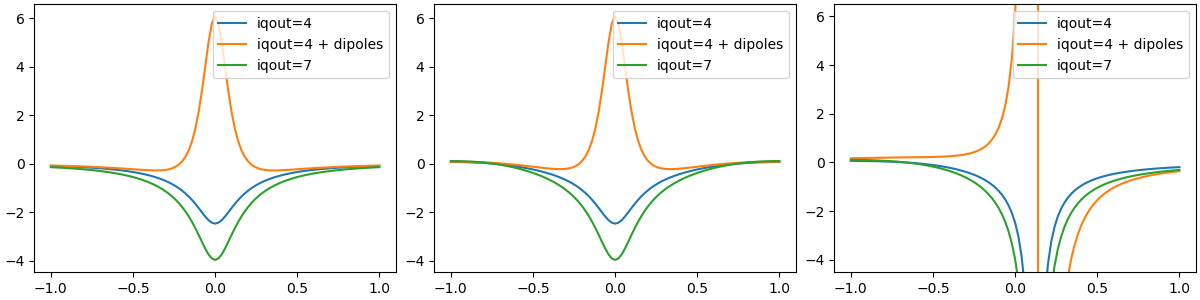

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), layout='constrained')

xs = np.linspace(-1, 1, 101)
rs = np.array([np.array([x, 0, 0]) for x in xs])
axs[0].plot(rs[:, 0], pointcharges_espf(pos, q4s, rs), label="iqout=4")
axs[0].plot(rs[:, 0], pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), label="iqout=4 + dipoles")
axs[0].plot(rs[:, 0], pointcharges_espf(pos, q7s, rs), label="iqout=7")
axs[0].legend()

ys = np.linspace(-1, 1, 101)
rs = np.array([np.array([0, y, 0]) for y in ys])
axs[1].plot(rs[:, 1], pointcharges_espf(pos, q4s, rs), label="iqout=4")
axs[1].plot(rs[:, 1], pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), label="iqout=4 + dipoles")
axs[1].plot(rs[:, 1], pointcharges_espf(pos, q7s, rs), label="iqout=7")
axs[1].legend()

zs = np.linspace(-1, 1, 101)
rs = np.array([np.array([0, 0, z]) for z in zs])
axs[2].plot(rs[:, 2], pointcharges_espf(pos, q4s, rs), label="iqout=4")
axs[2].plot(rs[:, 2], pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), label="iqout=4 + dipoles")
axs[2].plot(rs[:, 2], pointcharges_espf(pos, q7s, rs), label="iqout=7")
axs[2].legend()
axs[2].set_ylim(-4.5, 6.5)

## On 2D plane

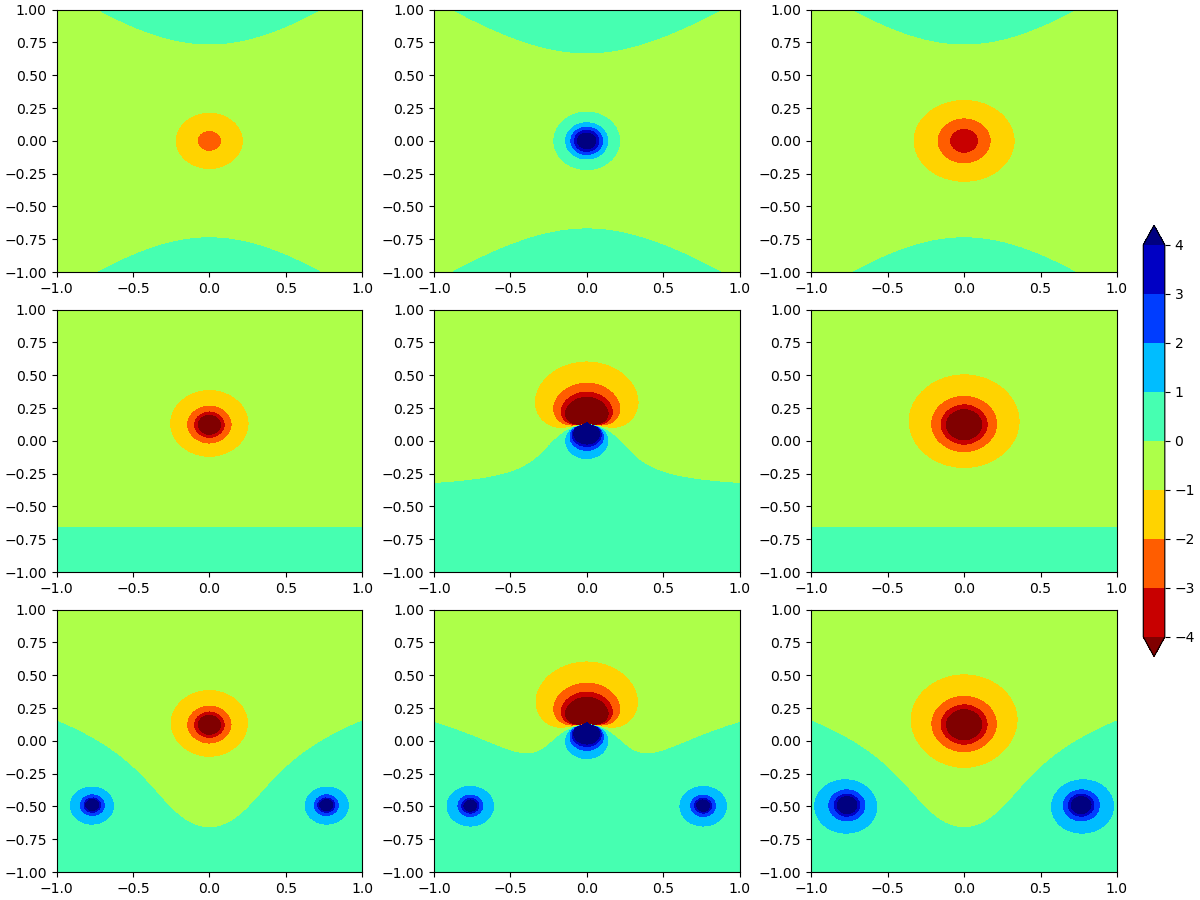

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(12, 9), layout='constrained')
levels = np.linspace(-4, 4, 9)

xs = np.linspace(-1, 1, 101)
ys = np.linspace(-1, 1, 101)
rs = np.array([np.array([x, y, 0]) for y in ys for x in xs])
axs[0, 0].contourf(xs, ys, np.reshape(pointcharges_espf(pos, q4s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[0, 1].contourf(xs, ys, np.reshape(pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[0, 2].contourf(xs, ys, np.reshape(pointcharges_espf(pos, q7s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')

xs = np.linspace(-1, 1, 101)
zs = np.linspace(-1, 1, 101)
rs = np.array([np.array([x, 0, z]) for z in zs for x in xs])
axs[1, 0].contourf(xs, zs, np.reshape(pointcharges_espf(pos, q4s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[1, 1].contourf(xs, zs, np.reshape(pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[1, 2].contourf(xs, zs, np.reshape(pointcharges_espf(pos, q7s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')

ys = np.linspace(-1, 1, 101)
zs = np.linspace(-1, 1, 101)
rs = np.array([np.array([0, y, z]) for z in zs for y in ys])
axs[2, 0].contourf(ys, zs, np.reshape(pointcharges_espf(pos, q4s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
axs[2, 1].contourf(ys, zs, np.reshape(pointcharges_espf(pos, q4s, rs) + dipoles_espf(pos, totaldips, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')
cf = axs[2, 2].contourf(ys, zs, np.reshape(pointcharges_espf(pos, q7s, rs), (-1, 101)), levels, cmap=mpl.cm.jet_r, extend='both')

fig.colorbar(cf, ax=axs[:, 2], shrink=0.5)

## In 3D space

In [8]:
points, mesh = vdw_surface(pos, symbols, density=50, scale_factor=1) # 1.4, 1.6, 1.8, and 2.0.

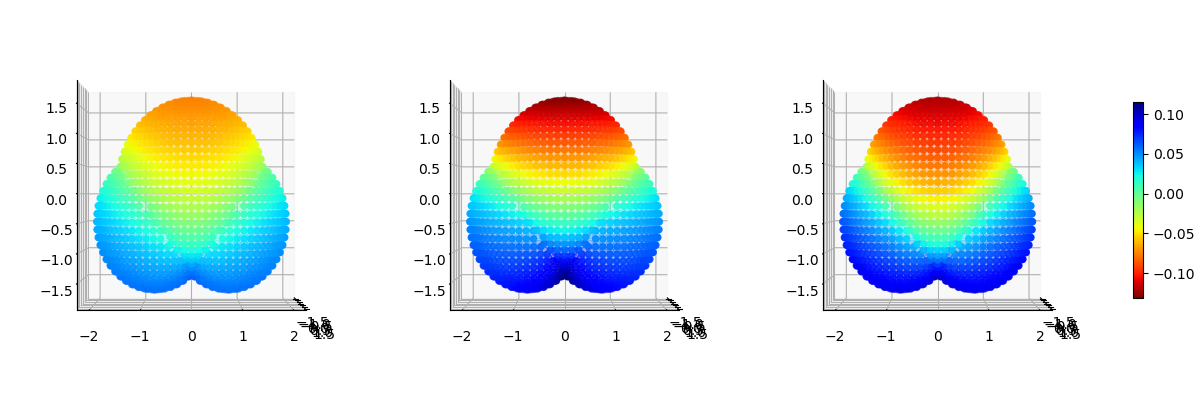

In [9]:
fig = plt.figure(figsize=(12, 4), layout='constrained')

espf0 = pointcharges_espf(pos, q4s, points)
espf1 = (pointcharges_espf(pos, q4s, points) + dipoles_espf(pos, totaldips, points))
espf2 = pointcharges_espf(pos, q7s, points)
espfs = np.concatenate([espf0, espf1, espf2])
min, max = espfs.min(), espfs.max()
norm = plt.Normalize(min, max)

axs0 = fig.add_subplot(1, 3, 1, projection='3d')
axs0.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf0, cmap=mpl.cm.jet_r, norm=norm)
axs0.set_box_aspect([1,1,1])
axs0.view_init(0, 0, 0)

axs1 = fig.add_subplot(1, 3, 2, projection='3d')
axs1.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf1, cmap=mpl.cm.jet_r, norm=norm)
axs1.set_box_aspect([1,1,1])
axs1.view_init(0, 0, 0)

axs2 = fig.add_subplot(1, 3, 3, projection='3d')
s = axs2.scatter(points[:, 0], points[:, 1], points[:, 2], c=espf2, cmap=mpl.cm.jet_r, norm=norm)
axs2.set_box_aspect([1,1,1])
axs2.view_init(0, 0, 0)

fig.colorbar(s, shrink=0.5)